## Урок 2. Обзор основных алгоритмов машинного обучения, используемых в соревнованиях

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import missingno as msno

In [ ]:
!pip install catboost
import catboost as cb

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/for_colab")

Mounted at /content/for_colab


In [ ]:
!unzip "/content/for_colab/My Drive/for_colab/assignment2_data.zip" -d /content/data

Archive:  /content/for_colab/My Drive/for_colab/assignment2_data.zip
  inflating: /content/data/assignment_2_test.csv  
  inflating: /content/data/assignment_2_train.csv  


В домашнем задании, будем обучать разные алгоритмы машинного обучения. Для этого, нужно предварительно зафиксировать схему валидации решения (можете выбрать любую, которую знаете). Выбранную схему валидации нужно использовать во всех задачах этого домашнего задания. Метрика качества - ROC AUC, целевая переменная - isFraud.
Ссылка на данные - https://drive.google.com/file/d/1gMEVl47pIoV1-AseB9doQ6DZNJrY3NkW/view?usp=sharing

Задание 1: отобрать только числовые признаки и обучить модель XGBoost с параметром booster = gbtree. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).



In [ ]:
train = pd.read_csv("data/assignment_2_train.csv")
test = pd.read_csv("data/assignment_2_test.csv")

In [ ]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3287000,1,7415038,226.00,W,12473,555.0,150.0,visa,226.0,credit,299.0,87.0,116.0,NaN,aol.com,NaN,2.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,3.0,0.0,3.0,2.0,6.0,2.0,4.0,4.0,0.0,4.0,3.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,452.000000,2924.000000,2924.000000,0.0,412.0,0.0,412.0,206.0,412.0,412.0,452.0,2512.0,2512.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3287001,0,7415054,3072.00,W,15651,417.0,150.0,visa,226.0,debit,330.0,87.0,NaN,NaN,yahoo.com,NaN,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,1.0,3059.949951,3059.949951,3059.949951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3059.949951,3059.949951,3059.949951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3287002,0,7415081,319.95,W,13844,583.0,150.0,visa,226.0,credit,126.0,87.0,9.0,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,1.0,319.950012,319.950012,319.950012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,319.950012,319.950012,319.950012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3287003,0,7415111,171.00,W,11556,309.0,150.0,visa,226.0,debit,181.0,87.0,3.0,NaN,anonymous.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,6.0,6.0,6.0,6.0,6.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,59.000000,59.000000,0.0,59.0,0.0,59.0,59.0,59.0,59.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3287004,0,7415112,107.95,W,10985,555.0,150.0,visa,226.0,debit,231.0,87.0,0.0,NaN,anonymous.com,NaN,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,10.0,2.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def get_numerical_features(df):
    numerical_features = df.select_dtypes(include=[np.number])
    return numerical_features


In [ ]:
x_train = (train.drop(["isFraud"], axis=1))
y_train = train["isFraud"]

x_test = (test.drop(["isFraud"], axis=1))
y_test = test["isFraud"]

print("x_train.shape = {} rows, {} cols".format(*x_train.shape))
print("x_test.shape = {} rows, {} cols".format(*x_test.shape))
print("y_train.shape = {} rows".format(*y_train.shape))
print("y_test.shape = {} rows".format(*y_test.shape))

x_train.shape = 180000 rows, 393 cols
x_test.shape = 100001 rows, 393 cols
y_train.shape = 180000 rows
y_test.shape = 100001 rows


In [ ]:
x_train_numF = get_numerical_features(x_train)
x_test_numF = get_numerical_features(x_test)

print("x_train_numF.shape = {} rows, {} cols".format(*x_train_numF.shape))
print("x_test_numF.shape = {} rows, {} cols".format(*x_test_numF.shape))

x_train_numF.shape = 180000 rows, 379 cols
x_test_numF.shape = 100001 rows, 379 cols


In [ ]:
params = {
    "booster": "gbtree", # параметр надо было указать по условию
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.1,
    "n_estimators": 1000,
    "reg_lambda": 100,
    "max_depth": 4,
    "gamma": 10,
    "nthread": 6,
    "seed": 27
}

In [ ]:
dtrain = xgb.DMatrix(
    data=x_train_numF, label=y_train
)
dtest = xgb.DMatrix(
    data=x_test_numF, label=y_test
)

In [ ]:
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    early_stopping_rounds=25, # параметр надо было указать по условию
    evals=[(dtrain, "train"), (dtest, "test")],
    verbose_eval=10,
    maximize=True,
)

[0]	train-auc:0.649994	test-auc:0.622395
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 25 rounds.
[10]	train-auc:0.796563	test-auc:0.757654
[20]	train-auc:0.821853	test-auc:0.779933
[30]	train-auc:0.859826	test-auc:0.838631
[40]	train-auc:0.873315	test-auc:0.845025
[50]	train-auc:0.88296	test-auc:0.851648
[60]	train-auc:0.889123	test-auc:0.85419
[70]	train-auc:0.892057	test-auc:0.85561
[80]	train-auc:0.895291	test-auc:0.855624
[90]	train-auc:0.898215	test-auc:0.855689
[100]	train-auc:0.900233	test-auc:0.856056
[110]	train-auc:0.902067	test-auc:0.857245
[120]	train-auc:0.903725	test-auc:0.857625
[130]	train-auc:0.905522	test-auc:0.85812
[140]	train-auc:0.906922	test-auc:0.858554
[150]	train-auc:0.908217	test-auc:0.858206
[160]	train-auc:0.909769	test-auc:0.858654
[170]	train-auc:0.9107	test-auc:0.859111
[180]	train-auc:0.911692	test-auc:0.859646
[190]	train-auc:0.912081	test-auc:0.859833
[200]	train-auc:

In [ ]:
train_xgb_num = model.predict(dtrain)
test_xgb_num = model.predict(dtest)

Задание 2: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1.




In [ ]:
def get_categorical_features(df):
    categorical_features = df.select_dtypes(include=[np.object])
    return categorical_features


In [ ]:
x_train_catF = get_categorical_features(train)
x_test_catF = get_categorical_features(test)

print("x_train_catF.shape = {} rows, {} cols".format(*x_train_catF.shape))
print("x_test_catF.shape = {} rows, {} cols".format(*x_test_catF.shape))

x_train_catF.shape = 180000 rows, 14 cols
x_test_catF.shape = 100001 rows, 14 cols


In [ ]:
x_train_catF.head(20)

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,F,F,F,F
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,W,visa,debit,gmail.com,NaN,T,T,T,M1,F,T,NaN,NaN,NaN
6,W,visa,debit,yahoo.com,NaN,T,T,T,M0,F,F,T,T,T
7,W,visa,debit,mail.com,NaN,NaN,NaN,NaN,M0,F,F,NaN,NaN,NaN
8,H,visa,debit,anonymous.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,W,mastercard,debit,yahoo.com,NaN,T,T,T,M0,T,T,NaN,NaN,NaN


In [ ]:
x_test_catF.head(2)

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,visa,credit,aol.com,NaN,T,T,F,M0,T,F,F,F,T
1,W,visa,debit,yahoo.com,NaN,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN,NaN


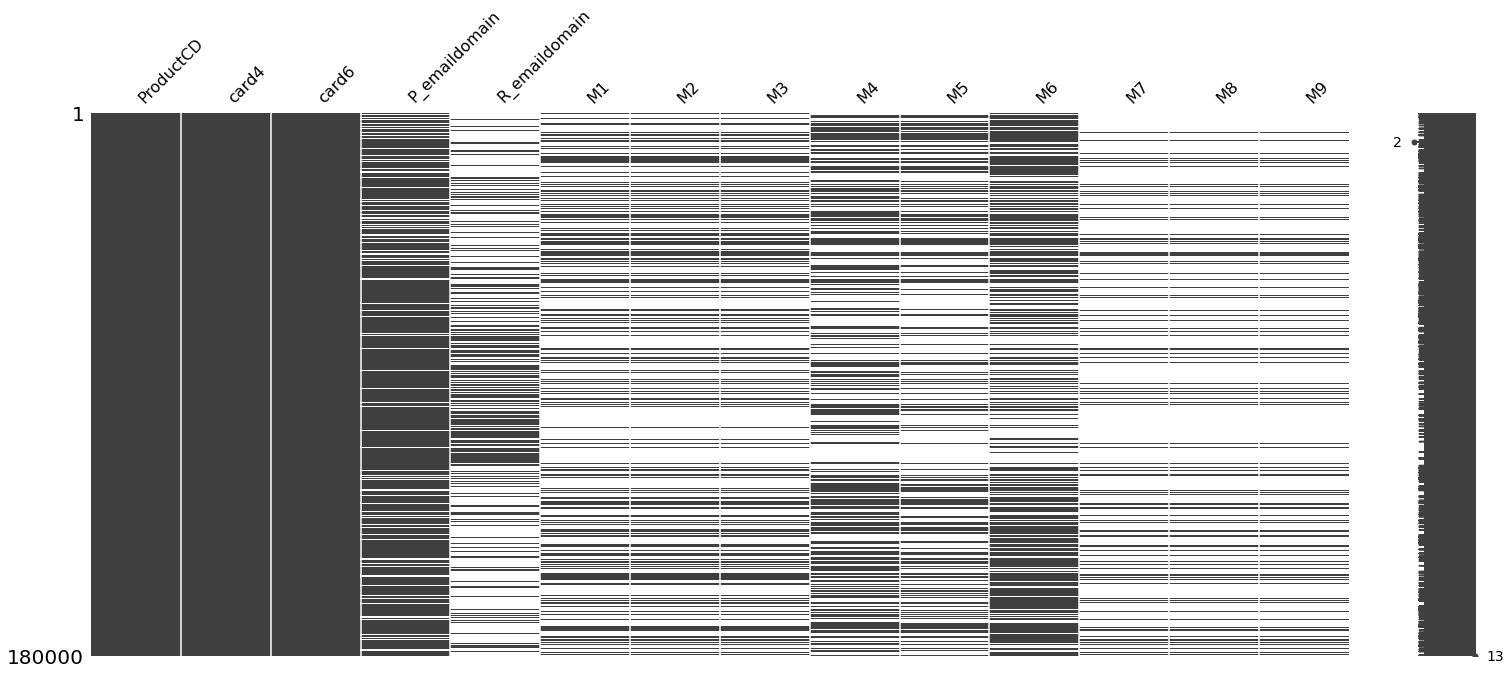

In [ ]:
msno.matrix(x_train_catF)

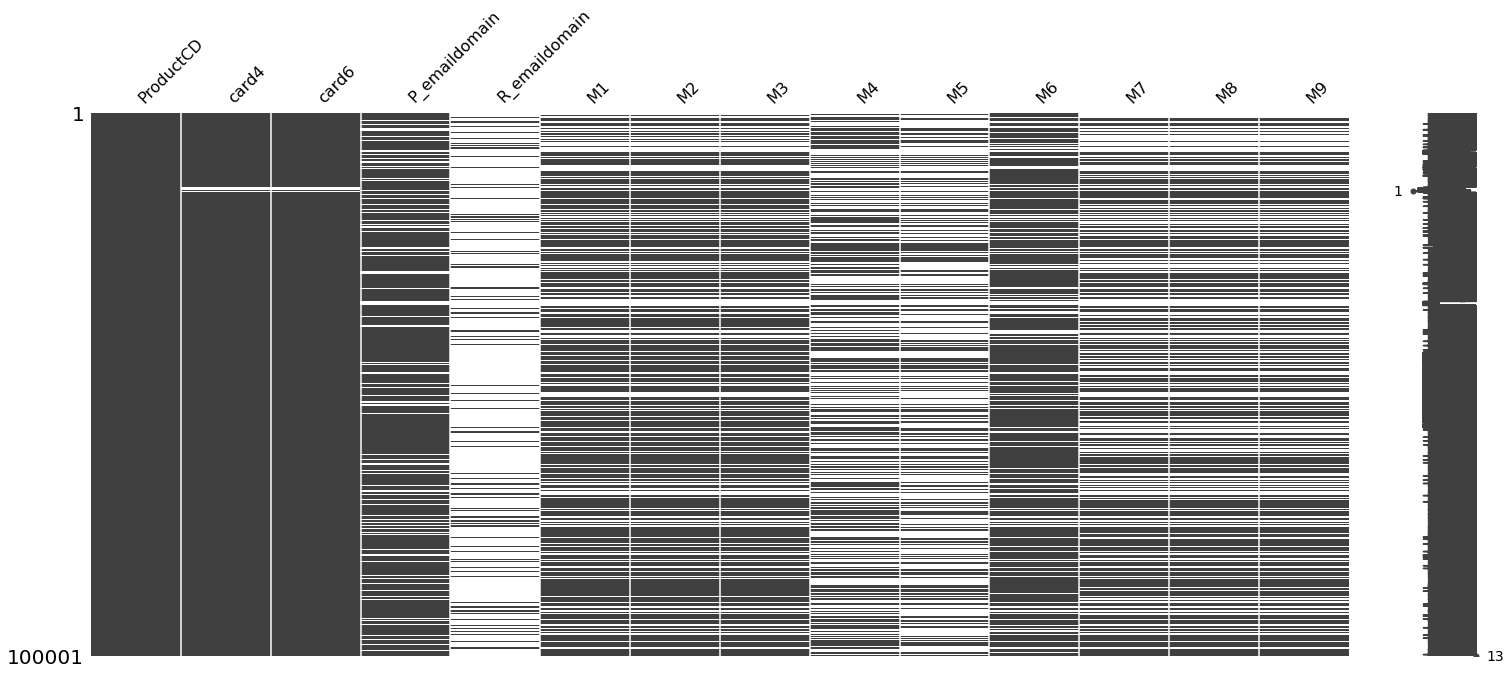

In [ ]:
msno.matrix(x_test_catF)

In [ ]:
x_train_catF.nunique().sort_values() # Количество уникальных значений по фичам

M1                2
M2                2
M3                2
M5                2
M6                2
M7                2
M8                2
M9                2
M4                3
card4             4
card6             4
ProductCD         5
P_emaildomain    59
R_emaildomain    60
dtype: int64

In [ ]:
x_test_catF.nunique().sort_values() # Количество уникальных значений по фичам

M1                2
M2                2
M3                2
M5                2
M6                2
M7                2
M8                2
M9                2
M4                3
card4             4
card6             4
ProductCD         5
R_emaildomain    56
P_emaildomain    59
dtype: int64

Text(0.5, 0, 'Missing Observations Count')

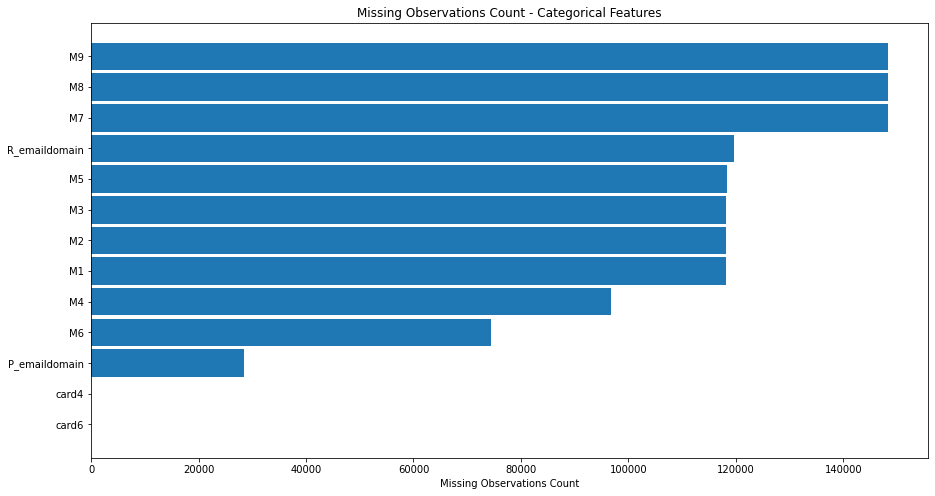

In [ ]:
missing_values = x_train_catF.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
fig, axes = plt.subplots(figsize=(15, 8))
rects = axes.barh(ind, missing_values.missing_count.values, height=0.9)
axes.set_yticks(ind)
axes.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
axes.set_title("Missing Observations Count - Categorical Features")
axes.set_xlabel("Missing Observations Count")

Думаю здесь фича R_emaildomain будет лишней и можно удалить, а еще лучше объединить с P_emaildomain. Фичи M9, M8, M7 содержат очень мало данных, думаю можно удалить.

Text(0.5, 0, 'Missing Observations Count')

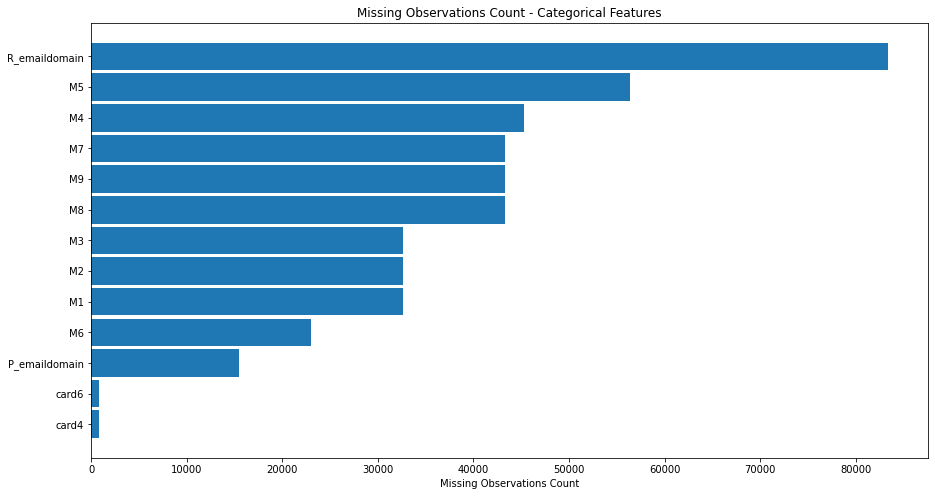

In [ ]:
missing_values = x_test_catF.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
fig, axes = plt.subplots(figsize=(15, 8))
rects = axes.barh(ind, missing_values.missing_count.values, height=0.9)
axes.set_yticks(ind)
axes.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
axes.set_title("Missing Observations Count - Categorical Features")
axes.set_xlabel("Missing Observations Count")

In [ ]:
list_M = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6']
for M in list_M[1:]:
  print(x_train_catF[M].value_counts(), x_train_catF[M].isnull().sum())

T    55657
F     6092
Name: M2, dtype: int64 118251
T    48603
F    13146
Name: M3, dtype: int64 118251
M0    51229
M2    18658
M1    13389
Name: M4, dtype: int64 96724
F    34262
T    27441
Name: M5, dtype: int64 118297
F    56627
T    49025
Name: M6, dtype: int64 74348


M1 Тоже лишнее, только одно значение False

В 'M1', 'M2', 'M3', 'M5', 'M6' заменим True на 1 False на 0

In [ ]:
for M in list_M[1:]:
  print(x_test_catF[M].value_counts(), x_test_catF[M].isnull().sum())

T    60426
F     6960
Name: M2, dtype: int64 32615
T    53424
F    13962
Name: M3, dtype: int64 32615
M0    35881
M2     9449
M1     9375
Name: M4, dtype: int64 45296
F    24076
T    19506
Name: M5, dtype: int64 56419
F    41829
T    35169
Name: M6, dtype: int64 23003


In [ ]:
x_train_catF['P_emaildomain'].fillna(x_train_catF['R_emaildomain'], inplace=True)
x_test_catF['P_emaildomain'].fillna(x_test_catF['R_emaildomain'], inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
# stopit

In [ ]:
x_train_catF = x_train_catF.drop(columns=['R_emaildomain', 'M1', 'M7', 'M8', 'M9'])
x_test_catF = x_test_catF.drop(columns=['R_emaildomain', 'M1', 'M7', 'M8', 'M9'])



In [ ]:
x_train_catF.head(2)

,ProductCD,card4,card6,P_emaildomain,M2,M3,M4,M5,M6
0,W,discover,credit,NaN,T,T,M2,F,T
1,W,mastercard,credit,gmail.com,NaN,NaN,M0,T,T


In [ ]:
for column in list_M[1:]:
    x_train_catF[column].fillna(3, inplace=True)
    x_train_catF.loc[x_train_catF[column] == 'T', column] = 1
    x_train_catF.loc[x_train_catF[column] == 'F', column] = 0

    x_test_catF[column].fillna(3, inplace=True)
    x_test_catF.loc[x_test_catF[column] == 'T', column] = 1
    x_test_catF.loc[x_test_catF[column] == 'F', column] = 0


In [ ]:
x_train_catF.loc[x_train_catF['M4'] == 'M0', 'M4'] = 0
x_train_catF.loc[x_train_catF['M4'] == 'M1', 'M4'] = 1
x_train_catF.loc[x_train_catF['M4'] == 'M2', 'M4'] = 2

x_test_catF.loc[x_test_catF['M4'] == 'M0', 'M4'] = 0
x_test_catF.loc[x_test_catF['M4'] == 'M1', 'M4'] = 1
x_test_catF.loc[x_test_catF['M4'] == 'M2', 'M4'] = 2

x_train_catF['P_emaildomain'].fillna("mail", inplace=True)
x_train_catF['card4'].fillna("unknown", inplace=True)
x_train_catF['card6'].fillna("unknown", inplace=True)

x_test_catF['P_emaildomain'].fillna("mail", inplace=True)
x_test_catF['card4'].fillna("unknown", inplace=True)
x_test_catF['card6'].fillna("unknown", inplace=True)

In [ ]:
cat_feat = x_train_catF.columns
cat_feat

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M2', 'M3', 'M4', 'M5',
       'M6'],
      dtype='object')

In [ ]:
encoder = LabelEncoder()
for column in cat_feat:
    x_train_catF[column] = encoder.fit_transform(x_train_catF[column])
    x_test_catF[column] = encoder.fit_transform(x_test_catF[column])

In [ ]:
x_train_catF['ProductCD'].unique()

array([4, 1, 0, 3, 2])

In [ ]:
x_train_catF.head(2)

,ProductCD,card4,card6,P_emaildomain,M2,M3,M4,M5,M6
0,4,1,1,29,1,1,2,0,1
1,4,2,1,16,2,2,0,1,1


In [ ]:
x_test_catF.head(2)

,ProductCD,card4,card6,P_emaildomain,M2,M3,M4,M5,M6
0,4,4,1,2,1,0,0,1,0
1,4,4,2,55,2,2,3,2,1


In [ ]:
x_train_catF.isnull().sum(axis=0).reset_index()

,index,0
0,ProductCD,0
1,card4,0
2,card6,0
3,P_emaildomain,0
4,M2,0
5,M3,0
6,M4,0
7,M5,0
8,M6,0


In [ ]:
# stopit

In [ ]:
x_train_cat_num_F = x_train_catF.join(x_train_numF)

x_test_cat_num_F = x_test_catF.join(x_test_numF)

In [ ]:
x_train_cat_num_F.isnull().sum(axis=0).reset_index()

,index,0
0,ProductCD,0
1,card4,0
2,card6,0
3,P_emaildomain,0
4,M2,0
...,...,...
383,V335,132004
384,V336,132004
385,V337,132004
386,V338,132004


In [ ]:
# stopit

Категориальные признаки придется переделать в числовые

In [ ]:
# cat_feats = ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M2', 'M3', 'M4', 'M5',
#        'M6']

In [ ]:
encoder = LabelEncoder()
for column in cat_feat:
    x_train_cat_num_F[column] = encoder.fit_transform(x_train_cat_num_F[column])
    x_test_cat_num_F[column] = encoder.fit_transform(x_test_cat_num_F[column])

In [ ]:

# lbl = preprocessing.LabelEncoder()
# x_train_catF['ProductCD'] = lbl.fit_transform(x_train_catF['ProductCD'].astype(str))
# x_train_catF['card4'] = lbl.fit_transform(x_train_catF['card4'].astype(str))
# x_train_catF['card6'] = lbl.fit_transform(x_train_catF['card6'].astype(str))
# x_train_catF['P_emaildomain'] = lbl.fit_transform(x_train_catF['P_emaildomain'].astype(str))

# x_test_catF['ProductCD'] = lbl.fit_transform(x_test_catF['ProductCD'].astype(str))
# x_test_catF['card4'] = lbl.fit_transform(x_test_catF['card4'].astype(str))
# x_test_catF['card6'] = lbl.fit_transform(x_test_catF['card6'].astype(str))
# x_test_catF['P_emaildomain'] = lbl.fit_transform(x_test_catF['P_emaildomain'].astype(str))

In [ ]:
dtrain = xgb.DMatrix(
    data=x_train_cat_num_F, label=y_train
)
dtest = xgb.DMatrix(
    data=x_test_cat_num_F, label=y_test
)

In [ ]:
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    early_stopping_rounds=25, # параметр надо было указать по условию
    evals=[(dtrain, "train"), (dtest, "test")],
    verbose_eval=10,
    maximize=True,
)

[0]	train-auc:0.649994	test-auc:0.622395
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 25 rounds.
[10]	train-auc:0.796563	test-auc:0.757654
[20]	train-auc:0.822001	test-auc:0.780106
[30]	train-auc:0.864028	test-auc:0.842598
[40]	train-auc:0.873174	test-auc:0.850755
[50]	train-auc:0.886508	test-auc:0.858477
[60]	train-auc:0.893267	test-auc:0.860265
[70]	train-auc:0.897445	test-auc:0.860885
[80]	train-auc:0.90133	test-auc:0.860772
[90]	train-auc:0.904408	test-auc:0.860788
[100]	train-auc:0.906534	test-auc:0.861611
[110]	train-auc:0.908586	test-auc:0.862069
[120]	train-auc:0.910252	test-auc:0.862928
[130]	train-auc:0.911708	test-auc:0.864331
[140]	train-auc:0.913307	test-auc:0.864275
[150]	train-auc:0.914501	test-auc:0.864774
[160]	train-auc:0.915927	test-auc:0.86546
[170]	train-auc:0.916921	test-auc:0.865943
[180]	train-auc:0.917857	test-auc:0.866263
[190]	train-auc:0.918371	test-auc:0.8663
[200]	train-au

In [ ]:
train_xgb_num_cat = model.predict(dtrain)
test_xgb_num_cat = model.predict(dtest)

Немного получше

Задание 4: для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).



In [ ]:
params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.01,
    "n_estimators": 200,
    "n_jobs": 6,
    "seed": 27
}

In [ ]:
dtrain = lgb.Dataset(
    data=x_train_numF, label=y_train
)
dtest = lgb.Dataset(
    data=x_test_numF, label=y_test
)

In [ ]:
model = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=1000,
    valid_sets=[dtrain, dtest],
    valid_names=["train", "test"],
    # categorical_feature="auto",
    early_stopping_rounds=25, # параметр надо было указать по условию
    verbose_eval=10
)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 25 rounds.
[10]	train's auc: 0.832909	test's auc: 0.79824
[20]	train's auc: 0.839236	test's auc: 0.800566
[30]	train's auc: 0.867022	test's auc: 0.839394
[40]	train's auc: 0.871751	test's auc: 0.842996
[50]	train's auc: 0.87526	test's auc: 0.844706
[60]	train's auc: 0.880624	test's auc: 0.849904
[70]	train's auc: 0.882515	test's auc: 0.851681
[80]	train's auc: 0.885194	test's auc: 0.853879
[90]	train's auc: 0.888574	test's auc: 0.854953
[100]	train's auc: 0.891459	test's auc: 0.855785
[110]	train's auc: 0.893373	test's auc: 0.856328
[120]	train's auc: 0.89539	test's auc: 0.857192
[130]	train's auc: 0.896915	test's auc: 0.857092
[140]	train's auc: 0.899847	test's auc: 0.856242
Early stopping, best iteration is:
[122]	train's auc: 0.895696	test's auc: 0.857349


In [ ]:
train_lgb_num = model.predict(x_train_numF)
test_lgb_num = model.predict(x_test_numF)

In [ ]:
# x_train_cat_num_F = pd.concat([
#     x_train_numF, x_train_catF], axis=0)

Задание 5: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. 

Выполнить задание 4.



Возьму обработнные категориальные признаки из 2го задания

In [ ]:
dtrain = lgb.Dataset(
    data=x_train_cat_num_F, label=y_train
)
dtest = lgb.Dataset(
    data=x_test_cat_num_F, label=y_test
)

model = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=1000,
    valid_sets=[dtrain, dtest],
    valid_names=["train", "test"],
    # categorical_feature="auto",
    early_stopping_rounds=25, # параметр надо было указать по условию
    verbose_eval=10
)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 25 rounds.
[10]	train's auc: 0.833392	test's auc: 0.798592
[20]	train's auc: 0.860985	test's auc: 0.82741
[30]	train's auc: 0.869164	test's auc: 0.841209
[40]	train's auc: 0.872967	test's auc: 0.8467
[50]	train's auc: 0.880742	test's auc: 0.851698
[60]	train's auc: 0.88366	test's auc: 0.854354
[70]	train's auc: 0.886084	test's auc: 0.856035
[80]	train's auc: 0.888605	test's auc: 0.857678
[90]	train's auc: 0.890214	test's auc: 0.858739
[100]	train's auc: 0.892	test's auc: 0.859372
[110]	train's auc: 0.893927	test's auc: 0.860931
[120]	train's auc: 0.895875	test's auc: 0.861918
[130]	train's auc: 0.898399	test's auc: 0.862823
[140]	train's auc: 0.901501	test's auc: 0.863481
[150]	train's auc: 0.904797	test's auc: 0.864764
[160]	train's auc: 0.906706	test's auc: 0.865085
[170]	train's auc: 0.908955	test's auc: 0.865131
[180]	train's auc: 0.911319	test's auc: 0.865294
[190]	train's auc: 0.913444	test's auc: 0.866202
[200]	train's auc: 0.91

In [ ]:
train_lgb_num_cat = model.predict(x_train_cat_num_F)
test_lgb_num_cat = model.predict(x_test_cat_num_F)

Задание 6: обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.



In [ ]:
cat_feats = ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M2', 'M3', 'M4', 'M5',
       'M6']


In [ ]:
x_test_cat_num_F.dtypes

ProductCD          int64
card4              int64
card6              int64
P_emaildomain      int64
M2                 int64
                  ...   
V335             float64
V336             float64
V337             float64
V338             float64
V339             float64
Length: 388, dtype: object

In [ ]:
for c in cat_feat:
    x_train_cat_num_F[c] = x_train_cat_num_F[c].astype('category')
    x_test_cat_num_F[c] = x_test_cat_num_F[c].astype('category')

In [ ]:
dtrain = lgb.Dataset(
    data=x_train_cat_num_F, label=y_train, categorical_feature=cat_feats
)
dtest = lgb.Dataset(
    data=x_test_cat_num_F, label=y_test, categorical_feature=cat_feats
)

In [ ]:
model = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=1000,
    valid_sets=[dtrain, dtest],
    valid_names=["train", "test"],
    categorical_feature=cat_feats,
    early_stopping_rounds=25, # параметр надо было указать по условию
    verbose_eval=10
)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 25 rounds.
[10]	train's auc: 0.833262	test's auc: 0.798386
[20]	train's auc: 0.861077	test's auc: 0.827158
[30]	train's auc: 0.870616	test's auc: 0.843959
[40]	train's auc: 0.874801	test's auc: 0.848264
[50]	train's auc: 0.881819	test's auc: 0.853755
[60]	train's auc: 0.88516	test's auc: 0.856838
[70]	train's auc: 0.887056	test's auc: 0.858164
[80]	train's auc: 0.889187	test's auc: 0.858226
[90]	train's auc: 0.891256	test's auc: 0.859227
[100]	train's auc: 0.895161	test's auc: 0.859661
[110]	train's auc: 0.898632	test's auc: 0.861282
[120]	train's auc: 0.901103	test's auc: 0.862165
[130]	train's auc: 0.903256	test's auc: 0.862937
[140]	train's auc: 0.906005	test's auc: 0.863885
[150]	train's auc: 0.908552	test's auc: 0.864262
[160]	train's auc: 0.910176	test's auc: 0.864759
[170]	train's auc: 0.91179	test's auc: 0.865242
[180]	train's auc: 0.912948	test's auc: 0.8656
[190]	train's auc: 0.914431	test's auc: 0.865965
[200]	train's auc: 0

In [ ]:
train_lgb_num_cat_self = model.predict(x_train_cat_num_F)
test_lgb_num_cat_self = model.predict(x_test_cat_num_F)

Задание 7: для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно)


In [ ]:
x_train, x_test = x_train_numF, x_test_numF
y_train, y_test = y_train, y_test

print("x_train.shape = {} rows, {} cols".format(*x_train.shape))
print("x_test.shape = {} rows, {} cols".format(*x_test.shape))

print("y_train.shape = {} rows".format(*y_train.shape))
print("y_test.shape = {} rows".format(*y_test.shape))

x_train.shape = 180000 rows, 379 cols
x_test.shape = 100001 rows, 379 cols
y_train.shape = 180000 rows
y_test.shape = 100001 rows


In [ ]:
cb_params = {
    "n_estimators": 1000,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "task_type": "CPU",
    "max_bin": 20,
    "verbose": 10,
    "max_depth": 6,
    "l2_leaf_reg": 100,
    "early_stopping_rounds": 25,
    "thread_count": 6,
    "random_seed": 42
}

In [ ]:
train_pool = cb.Pool(x_train, y_train)
test_pool = cb.Pool(x_test, y_test)

In [ ]:
model = cb.CatBoostClassifier(**cb_params)
model.fit(train_pool, eval_set=test_pool)

0:	test: 0.6290627	best: 0.6290627 (0)	total: 277ms	remaining: 4m 36s
10:	test: 0.7633746	best: 0.7633746 (10)	total: 2.34s	remaining: 3m 30s
20:	test: 0.8088820	best: 0.8088820 (20)	total: 4.49s	remaining: 3m 29s
30:	test: 0.8294974	best: 0.8294974 (30)	total: 6.59s	remaining: 3m 25s
40:	test: 0.8380974	best: 0.8381444 (39)	total: 8.75s	remaining: 3m 24s
50:	test: 0.8393262	best: 0.8398211 (48)	total: 11s	remaining: 3m 24s
60:	test: 0.8392079	best: 0.8398211 (48)	total: 13.2s	remaining: 3m 23s
70:	test: 0.8400384	best: 0.8402964 (68)	total: 15.6s	remaining: 3m 23s
80:	test: 0.8391390	best: 0.8402964 (68)	total: 17.9s	remaining: 3m 22s
90:	test: 0.8404271	best: 0.8404271 (90)	total: 20.1s	remaining: 3m 20s
100:	test: 0.8380929	best: 0.8404271 (90)	total: 22.4s	remaining: 3m 19s
110:	test: 0.8381470	best: 0.8404271 (90)	total: 24.6s	remaining: 3m 16s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.8404270943
bestIteration = 90

Shrink model to first 91 iterations.


In [ ]:
train_cgb_num = model.predict(x_train_numF)
test_cgb_num = model.predict(x_test_numF)

Задание 8: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.



In [ ]:
for column in cat_feats:
    x_train_cat_num_F[column] = encoder.fit_transform(x_train_cat_num_F[column].astype(str))
    x_test_cat_num_F[column] = encoder.fit_transform(x_test_cat_num_F[column].astype(str))

In [ ]:
x_train, x_test = x_train_cat_num_F, x_test_cat_num_F
y_train, y_test = y_train, y_test

print("x_train.shape = {} rows, {} cols".format(*x_train.shape))
print("x_test.shape = {} rows, {} cols".format(*x_test.shape))

print("y_train.shape = {} rows".format(*y_train.shape))
print("y_test.shape = {} rows".format(*y_test.shape))

x_train.shape = 180000 rows, 388 cols
x_test.shape = 100001 rows, 388 cols
y_train.shape = 180000 rows
y_test.shape = 100001 rows


In [ ]:
cb_params = {
    "n_estimators": 1000,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "task_type": "CPU",
    "max_bin": 20,
    "verbose": 10,
    "max_depth": 6,
    "l2_leaf_reg": 100,
    "early_stopping_rounds": 25,
    "thread_count": 6,
    "random_seed": 42
}

In [ ]:
train_pool = cb.Pool(x_train, y_train)
test_pool = cb.Pool(x_test, y_test)

In [ ]:
model = cb.CatBoostClassifier(**cb_params)
model.fit(train_pool, eval_set=test_pool)

0:	test: 0.6593752	best: 0.6593752 (0)	total: 214ms	remaining: 3m 33s
10:	test: 0.7885699	best: 0.7896189 (9)	total: 2.5s	remaining: 3m 44s
20:	test: 0.8282556	best: 0.8290013 (18)	total: 4.63s	remaining: 3m 35s
30:	test: 0.8396630	best: 0.8405423 (26)	total: 6.82s	remaining: 3m 33s
40:	test: 0.8416053	best: 0.8416053 (40)	total: 9.07s	remaining: 3m 32s
50:	test: 0.8419436	best: 0.8434874 (48)	total: 11.4s	remaining: 3m 31s
60:	test: 0.8431240	best: 0.8434874 (48)	total: 13.7s	remaining: 3m 30s
70:	test: 0.8427997	best: 0.8436905 (61)	total: 15.9s	remaining: 3m 28s
80:	test: 0.8445874	best: 0.8445874 (80)	total: 18.2s	remaining: 3m 26s
90:	test: 0.8452306	best: 0.8453750 (88)	total: 20.5s	remaining: 3m 24s
100:	test: 0.8461254	best: 0.8464206 (97)	total: 22.9s	remaining: 3m 23s
110:	test: 0.8461776	best: 0.8464206 (97)	total: 25.4s	remaining: 3m 23s
120:	test: 0.8462346	best: 0.8464206 (97)	total: 27.8s	remaining: 3m 21s
Stopped by overfitting detector  (25 iterations wait)

bestTest =

In [ ]:
train_cgb_num_cat = model.predict(x_train_cat_num_F)
test_cgb_num_cat = model.predict(x_test_cat_num_F)

Задание 9: обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.



In [ ]:
# x_train, x_test = x_train_catF, x_test_catF
# y_train, y_test = y_train, y_test

# print("x_train.shape = {} rows, {} cols".format(*x_train.shape))
# print("x_test.shape = {} rows, {} cols".format(*x_test.shape))

# print("y_train.shape = {} rows".format(*y_train.shape))
# print("y_test.shape = {} rows".format(*y_test.shape))

In [ ]:
x_train[cat_feat] = x_train[cat_feat].astype(str)
x_test[cat_feat] = x_test[cat_feat].astype(str)


In [ ]:
cb_params = {
    "n_estimators": 1000,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "task_type": "CPU",
    "max_bin": 20,
    "verbose": 10,
    "max_depth": 6,
    "l2_leaf_reg": 100,
    "early_stopping_rounds": 25,
    "thread_count": 6,
    "random_seed": 42
}

In [ ]:
train_pool = cb.Pool(x_train, y_train, cat_features=cat_feats)
test_pool = cb.Pool(x_test, y_test, cat_features=cat_feats)

In [ ]:
model = cb.CatBoostClassifier(**cb_params)
model.fit(train_pool, eval_set=test_pool)

0:	test: 0.5997202	best: 0.5997202 (0)	total: 729ms	remaining: 12m 8s
10:	test: 0.7872776	best: 0.7872776 (10)	total: 7.39s	remaining: 11m 4s
20:	test: 0.8140220	best: 0.8140220 (20)	total: 14.2s	remaining: 10m 59s
30:	test: 0.8321774	best: 0.8321774 (30)	total: 20.7s	remaining: 10m 47s
40:	test: 0.8338321	best: 0.8338321 (40)	total: 27.5s	remaining: 10m 43s
50:	test: 0.8352970	best: 0.8362333 (49)	total: 34s	remaining: 10m 32s
60:	test: 0.8382545	best: 0.8382655 (59)	total: 40.9s	remaining: 10m 29s
70:	test: 0.8430655	best: 0.8430655 (70)	total: 47.7s	remaining: 10m 24s
80:	test: 0.8437725	best: 0.8446773 (74)	total: 54.6s	remaining: 10m 19s
90:	test: 0.8460379	best: 0.8460924 (89)	total: 1m 1s	remaining: 10m 10s
100:	test: 0.8458786	best: 0.8461728 (91)	total: 1m 7s	remaining: 10m 2s
110:	test: 0.8455339	best: 0.8461728 (91)	total: 1m 14s	remaining: 9m 54s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 0.8461727903
bestIteration = 91

Shrink model to first 92 itera

In [ ]:
train_cgb_num_cat_self = model.predict(x_train_cat_num_F)
test_cgb_num_cat_self = model.predict(x_test_cat_num_F)

Обработка категориальных признаков встроенным методом оказалась чуточку получше

Задание 10: построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.



In [ ]:
def plot_roc (train, test):
    plt.figure(figsize=(10, 8))
    predictions = train, test
    labels = ['train', 'test']
    for i, y_pred in enumerate(predictions):
        fpr, tpr, _ = roc_curve([y_train, y_test][i], y_pred)
        auc = round(roc_auc_score([y_train, y_test][i], y_pred), 3)
        plt.plot(fpr, tpr, label=f'{labels[i]}, auc={auc}')
    plt.title('ROC-кривые', size=14)
    plt.legend()
    plt.show()

XGBoost на числовых признаках

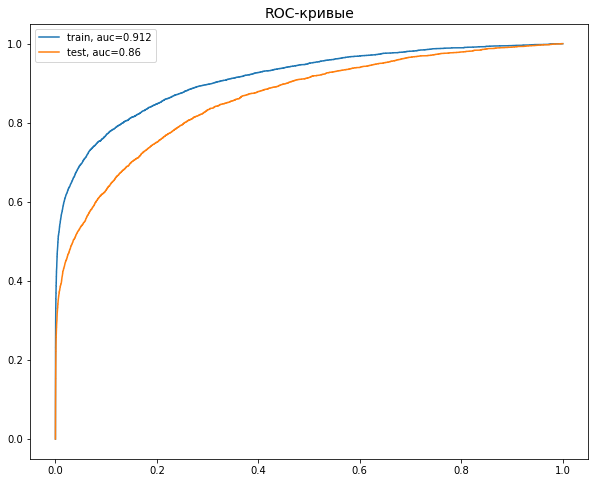

In [ ]:
plot_roc(train_xgb_num, test_xgb_num)

XGBoost на числовых и категориальных признаках

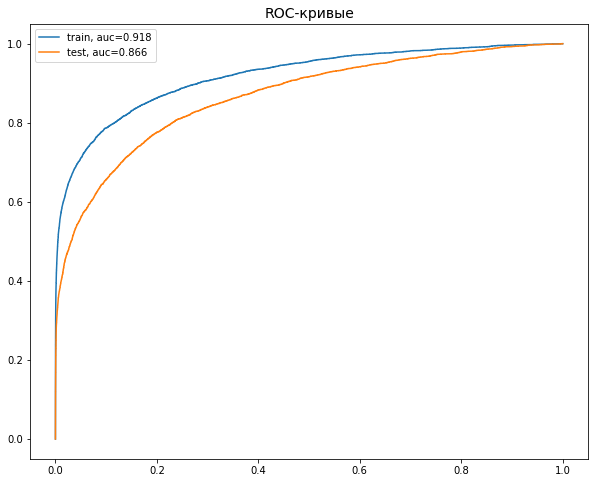

In [ ]:
plot_roc(train_xgb_num_cat, test_xgb_num_cat)

LightGBM на числовых признаках

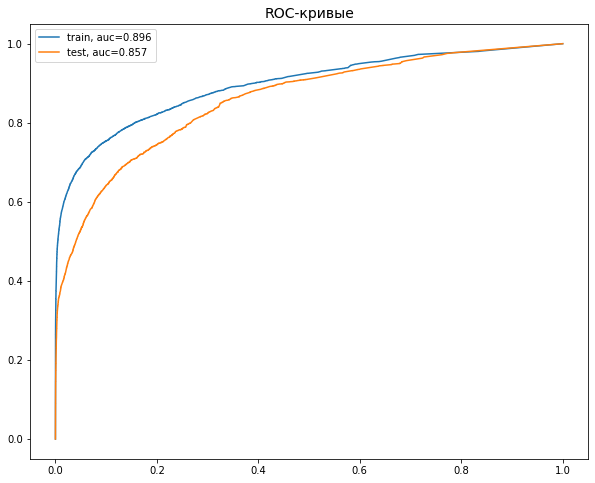

In [ ]:
plot_roc(train_lgb_num, test_lgb_num)

LightGBM на числовых и категориальных признаках

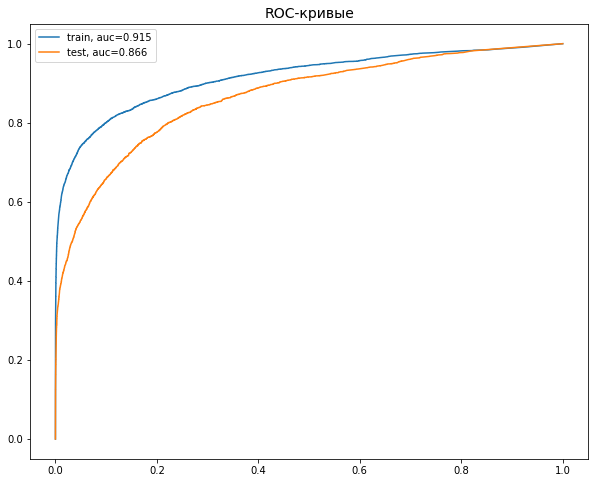

In [ ]:
plot_roc(train_lgb_num_cat, test_lgb_num_cat)

LightGBM на числовых и категориальных признаках (категориальные признаки обработаны встроенным методом LightGBM)

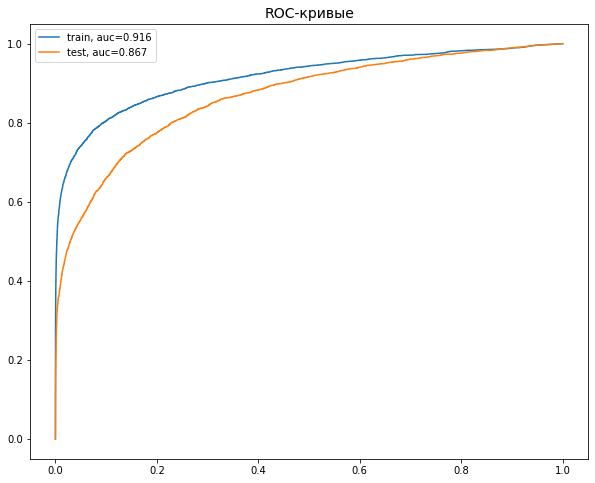

In [ ]:
plot_roc(train_lgb_num_cat_self, test_lgb_num_cat_self)

CatBoost на числовых признаках

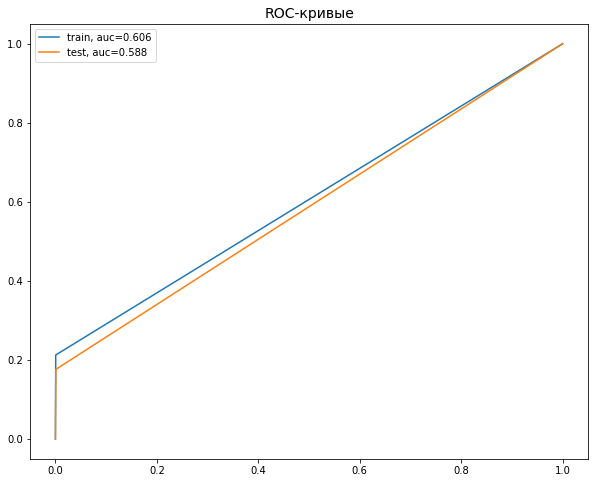

In [ ]:
plot_roc(train_cgb_num, test_cgb_num)

CatBoost на числовых и категориальных признаках

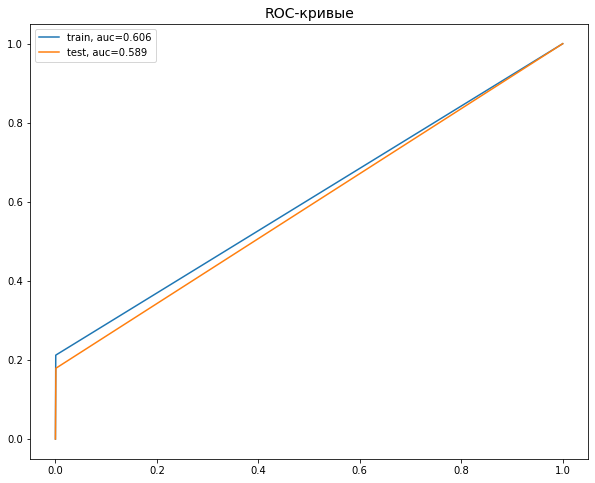

In [ ]:
plot_roc(train_cgb_num_cat, test_cgb_num_cat)

CatBoost на числовых и категориальных признаках (категориальные признаки обработаны встроенным методом CatBoost)

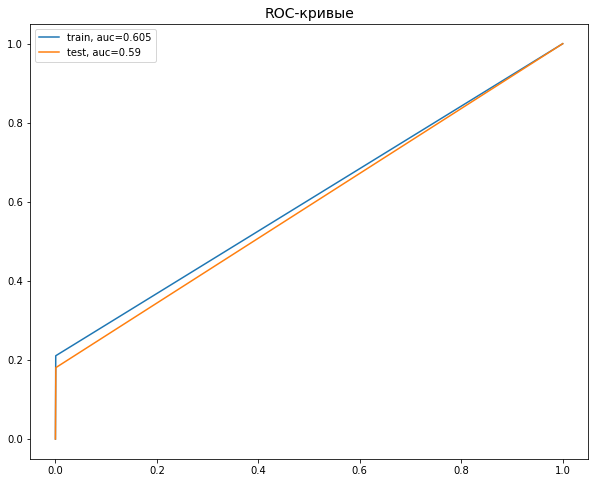

In [ ]:
plot_roc(train_cgb_num_cat_self, test_cgb_num_cat_self)

Качество на тестовой выборки постепенно растет, приближаясь к качеству тренировочной выборки. Если я не ошибаюсь, переобучение это когда графики начинают расходиться. Тут такое не наблюдается. 

In [ ]:
# train_xgb_num, test_xgb_num
# train_xgb_num_cat, test_xgb_num_cat
# train_lgb_num, test_lgb_num
# train_lgb_num_cat, test_lgb_num_cat
# train_lgb_num_cat_self, test_lgb_num_cat_self
# train_cgb_num, test_cgb_num
# train_cgb_num_cat, test_cgb_num_cat
# train_cgb_num_cat_self, test_cgb_num_cat_self

К сожалению, не успеваю выполнить дополнительные задания

Задание на повторение:
Задание не обязательно к выполнению, но очень рекомендуется для понимания набора данных, этот набор данных будет использован и для следующего домашнего задания.

Задание 1: Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.
Задание 2: построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.
Задание 3: построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.
Задание 4: построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.